In [53]:
import pandas as pd
import numpy as np
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

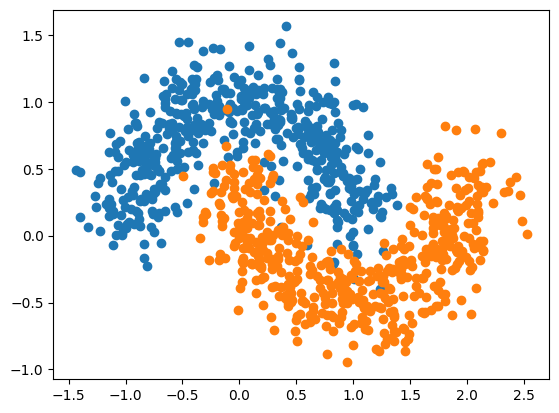

In [54]:
X, y = make_moons(n_samples=1000, noise=0.2)
xAxis1, yAxis1,xAxis2, yAxis2= X[y==0, 0], X[y==0, 1], X[y==1, 0], X[y==1, 1]
plt.scatter(xAxis1, yAxis1,marker="o")
plt.scatter(xAxis2, yAxis2,marker="o")
plt.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)


[[ 0.16936721  1.51914849]
 [ 0.79094589 -1.49873481]
 [ 1.34874687  0.23281315]
 ...
 [ 0.26878445 -1.30862592]
 [ 1.1461352  -0.87350369]
 [-0.05654864 -0.26888674]]


In [56]:

class LogisticRegression(torch.nn.Module): 
    def __init__(self, input_size): 
        super(LogisticRegression, self).__init__() 
        self.linear = torch.nn.Linear(input_size, 1) 
        self.sigmoid = torch.nn.Sigmoid()
  
    def forward(self, x): 
        out = self.linear(x) 
        out = self.sigmoid(out) 
        return out 

In [57]:
logistic_model = LogisticRegression(2)
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [58]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(logistic_model.parameters(), lr = 0.01)

In [59]:
error = []
for epoch in range(1000):
    logistic_model.train()
    optimizer.zero_grad()
    pred_y = logistic_model(X_train).squeeze()
    loss = criterion(pred_y, y_train)
    loss.backward()
    optimizer.step()
    error.append(loss.item())
    if (epoch + 100) % 100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1.0827950239181519
epoch 100, loss 0.5124431252479553
epoch 200, loss 0.385501503944397
epoch 300, loss 0.3413924276828766
epoch 400, loss 0.3197420537471771
epoch 500, loss 0.3077349066734314
epoch 600, loss 0.300803005695343
epoch 700, loss 0.29672759771347046
epoch 800, loss 0.2943084239959717
epoch 900, loss 0.2928694486618042


In [60]:
logistic_model.eval()
y_pred_train = torch.round(torch.flatten(logistic_model(X_train))).detach().numpy()
y_pred_test = torch.round(torch.flatten(logistic_model(X_test))).detach().numpy()

y_train = y_train.detach().numpy()
y_test = y_test.detach().numpy()


print("The accuracy score for training data is ", accuracy_score(y_train, y_pred_train))
print("The accuracy score for testing data is ", accuracy_score(y_test, y_pred_test))


print("The f1 score for training data is ", f1_score(y_train, y_pred_train))
print("The f1 score for testing data is ", f1_score(y_test, y_pred_test))



The accuracy score for training data is  0.86375
The accuracy score for testing data is  0.925
The f1 score for training data is  0.8655980271270037
The f1 score for testing data is  0.9246231155778895


In [61]:
min_X, max_X, min_y, max_y = X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:,1].max()

x_range, y_range = np.arange(min_X, max_X, 0.01), np. arange(min_y, max_y, 0.01)
xx, yy = np.meshgrid(x_range, y_range)
mesh = np.c_[xx.ravel(), yy.ravel()]
mesh = scaler.transform(mesh)
mesh = torch.tensor(mesh, dtype=torch.float32)
print(xx.shape)

(252, 396)


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


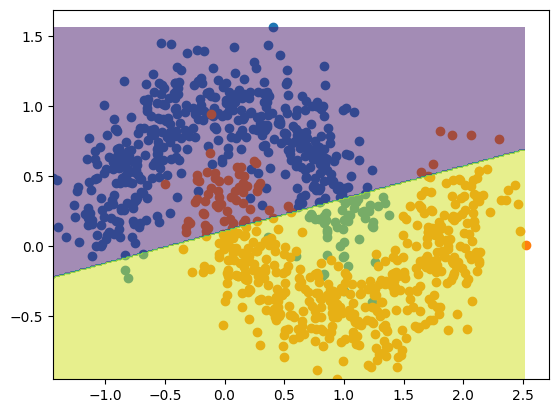

In [62]:
logistic_model.eval()
Z = torch.round(torch.flatten(logistic_model(mesh))).detach().numpy()
Z= Z.reshape(xx.shape)
print(Z)
plt.scatter(xAxis1, yAxis1,marker="o")
plt.scatter(xAxis2, yAxis2,marker="o")
plt.contourf(xx, yy, Z, alpha=0.5)
plt.show()